#Needed libraries

In [508]:
if (!require("caret")) install.packages("caret")
if (!require("rBayesianOptimization")) install.packages("rBayesianOptimization")
if (!require("e1071")) install.packages("e1071")
if (!require("randomForest")) install.packages("randomForest")
if (!require("gbm")) install.packages("gbm")
if (!require("kknn")) install.packages("kknn")
if (!require("class")) install.packages("class")
if (!require("kernlab")) install.packages("kernlab")
if (!require("smotefamily")) install.packages("smotefamily")
if (!require("ROSE")) install.packages("ROSE")
if (!require("PRROC")) install.packages("PRROC")


Loading required package: PRROC

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘PRROC’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [509]:
library(readxl)
library(dplyr)
library(caret)
library(rBayesianOptimization)
library(e1071)
library(randomForest)
library(class)
library(gbm)
library(kknn)
library(kernlab)
library(smotefamily)
library(ROSE)
library(ggplot2)
library(pROC)
library(PRROC)



Attaching package: ‘PRROC’


The following object is masked from ‘package:ROSE’:

    roc.curve




#Basic statistics

In [ ]:
file_path <- "/content/Breast_Cancer.xlsx"

# Read the data from the Excel file
data <- read_excel(file_path)
head(data)

Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive


In [ ]:
print(colnames(data))

 [1] "Age"                    "Race"                   "Marital Status"        
 [4] "T Stage"                "N Stage"                "6th Stage"             
 [7] "differentiate"          "Grade"                  "A Stage"               
[10] "Tumor Size"             "Estrogen Status"        "Progesterone Status"   
[13] "Regional Node Examined" "Reginol Node Positive"  "Survival Months"       
[16] "Status"                


In [ ]:
# Basic statistics for column types
column_types <- sapply(data, class)
print(column_types)

                   Age                   Race         Marital Status 
             "numeric"            "character"            "character" 
               T Stage                N Stage              6th Stage 
           "character"            "character"            "character" 
         differentiate                  Grade                A Stage 
           "character"            "character"            "character" 
            Tumor Size        Estrogen Status    Progesterone Status 
             "numeric"            "character"            "character" 
Regional Node Examined  Reginol Node Positive        Survival Months 
             "numeric"              "numeric"              "numeric" 
                Status 
           "character" 


In [ ]:
# Summary statistics for numerical columns
numeric_summary <- summary(select_if(data, is.numeric))
print(numeric_summary)

      Age          Tumor Size     Regional Node Examined Reginol Node Positive
 Min.   :30.00   Min.   :  1.00   Min.   : 1.00          Min.   : 1.000       
 1st Qu.:47.00   1st Qu.: 16.00   1st Qu.: 9.00          1st Qu.: 1.000       
 Median :54.00   Median : 25.00   Median :14.00          Median : 2.000       
 Mean   :53.97   Mean   : 30.47   Mean   :14.36          Mean   : 4.158       
 3rd Qu.:61.00   3rd Qu.: 38.00   3rd Qu.:19.00          3rd Qu.: 5.000       
 Max.   :69.00   Max.   :140.00   Max.   :61.00          Max.   :46.000       
 Survival Months
 Min.   :  1.0  
 1st Qu.: 56.0  
 Median : 73.0  
 Mean   : 71.3  
 3rd Qu.: 90.0  
 Max.   :107.0  


In [ ]:
# Check for missing values in the original data
print(sapply(data, function(x) sum(is.na(x))))

                   Age                   Race         Marital Status 
                     0                      0                      0 
               T Stage                N Stage              6th Stage 
                     0                      0                      0 
         differentiate                  Grade                A Stage 
                     0                      0                      0 
            Tumor Size        Estrogen Status    Progesterone Status 
                     0                      0                      0 
Regional Node Examined  Reginol Node Positive        Survival Months 
                     0                      0                      0 
                Status 
                     0 


In [ ]:
# Percentiles for numerical columns
numeric_percentiles <- data %>%
  select_if(is.numeric) %>%
  summarise_all(list(
    Q1 = ~quantile(., probs = 0.25, na.rm = TRUE),
    Median = ~quantile(., probs = 0.5, na.rm = TRUE),
    Q3 = ~quantile(., probs = 0.75, na.rm = TRUE)
  ))
print(numeric_percentiles)

# A tibble: 1 × 15
  Age_Q1 `Tumor Size_Q1` `Regional Node Examined_Q1` `Reginol Node Positive_Q1`
   <dbl>           <dbl>                       <dbl>                      <dbl>
1     47              16                           9                          1
# ℹ 11 more variables: `Survival Months_Q1` <dbl>, Age_Median <dbl>,
#   `Tumor Size_Median` <dbl>, `Regional Node Examined_Median` <dbl>,
#   `Reginol Node Positive_Median` <dbl>, `Survival Months_Median` <dbl>,
#   Age_Q3 <dbl>, `Tumor Size_Q3` <dbl>, `Regional Node Examined_Q3` <dbl>,
#   `Reginol Node Positive_Q3` <dbl>, `Survival Months_Q3` <dbl>


# Data preprocessing

In [ ]:
#Removing the race column from the dataset as it can be misleading
data <- select(data, -Race)

In [ ]:
head(data)

Age,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
68,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
50,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
58,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
58,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
47,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
51,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive


##Scaling the data
The numericla data is sclaed first as the cetegorical columns dont have much variance as they consist of 3-4 classes and scaling is not needed for them.

In [ ]:
# Function to scale only numeric columns
scale_numeric <- function(df) {
  df %>%
    mutate(across(where(is.numeric), scale))
}

# Appling the function to the dataframe
scaled_data <- scale_numeric(data)

head(scaled_data)

Age,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
"<dbl[,1]>",<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,"<dbl[,1]>",<chr>,<chr>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<chr>
1.5650589,Married,T1,N1,IIA,Poorly differentiated,3,Regional,-1.2535056,Positive,Positive,1.1905284,-0.6180949,-0.4928995,Alive
-0.4431672,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,0.2143185,Positive,Positive,-0.0440891,0.1647864,-0.4056450,Alive
0.4493777,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,1.5400952,Positive,Positive,-0.0440891,0.5562271,0.1615099,Alive
0.4493777,Married,T1,N1,IIA,Poorly differentiated,3,Regional,-0.5906173,Positive,Positive,-1.5256301,-0.6180949,0.5541556,Alive
-0.7778715,Married,T2,N1,IIB,Poorly differentiated,3,Regional,0.4984135,Positive,Positive,-1.4021683,-0.6180949,-0.9291725,Alive
-0.3315991,Single,T1,N1,IIA,Moderately differentiated,2,Regional,-0.4959190,Positive,Positive,0.4497579,-0.4223746,0.7722920,Alive


##Removing outliers
The method of choice will be IQR Method as it is a robust method to handle all kinds of distributions.

In [ ]:
# Function to remove outliers based on IQR without removing rows
remove_outliers_iqr <- function(df) {
  num_cols <- sapply(df, is.numeric)
  df[num_cols] <- lapply(df[num_cols], function(x) {
    Q1 <- quantile(x, 0.25, na.rm = TRUE)
    Q3 <- quantile(x, 0.75, na.rm = TRUE)
    IQR <- Q3 - Q1
    lower_bound <- Q1 - 1.5 * IQR
    upper_bound <- Q3 + 1.5 * IQR
    x[x < lower_bound | x > upper_bound] <- NA
    return(x)
  })
  return(df)
}

# Apply IQR method to remove outliers without removing rows
data_no_outliers <- remove_outliers_iqr(scaled_data)

In [ ]:
head(data_no_outliers)

Age,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
"<dbl[,1]>",<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,"<dbl[,1]>",<chr>,<chr>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<chr>
1.5650589,Married,T1,N1,IIA,Poorly differentiated,3,Regional,-1.2535056,Positive,Positive,1.1905284,-0.6180949,-0.4928995,Alive
-0.4431672,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,0.2143185,Positive,Positive,-0.0440891,0.1647864,-0.4056450,Alive
0.4493777,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,1.5400952,Positive,Positive,-0.0440891,0.5562271,0.1615099,Alive
0.4493777,Married,T1,N1,IIA,Poorly differentiated,3,Regional,-0.5906173,Positive,Positive,-1.5256301,-0.6180949,0.5541556,Alive
-0.7778715,Married,T2,N1,IIB,Poorly differentiated,3,Regional,0.4984135,Positive,Positive,-1.4021683,-0.6180949,-0.9291725,Alive
-0.3315991,Single,T1,N1,IIA,Moderately differentiated,2,Regional,-0.4959190,Positive,Positive,0.4497579,-0.4223746,0.7722920,Alive


In [ ]:
# Check for missing values in the original data
print(sapply(data_no_outliers, function(x) sum(is.na(x))))

                   Age         Marital Status                T Stage 
                     0                      0                      0 
               N Stage              6th Stage          differentiate 
                     0                      0                      0 
                 Grade                A Stage             Tumor Size 
                     0                      0                    222 
       Estrogen Status    Progesterone Status Regional Node Examined 
                     0                      0                     72 
 Reginol Node Positive        Survival Months                 Status 
                   400                     18                      0 


Since we have little data we will be replacing the missing values with the mean

In [ ]:
# Function to replace NA with median
replace_na_with_median <- function(df) {
  df %>%
    mutate(across(where(is.numeric), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))
}

# Apply the function to the dataframe
imputed_df <- replace_na_with_median(data_no_outliers)


In [ ]:
head(imputed_df)

Age,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
"<dbl[,1]>",<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,"<dbl[,1]>",<chr>,<chr>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<chr>
1.5650589,Married,T1,N1,IIA,Poorly differentiated,3,Regional,-1.2535056,Positive,Positive,1.1905284,-0.6180949,-0.4928995,Alive
-0.4431672,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,0.2143185,Positive,Positive,-0.0440891,0.1647864,-0.4056450,Alive
0.4493777,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,1.5400952,Positive,Positive,-0.0440891,0.5562271,0.1615099,Alive
0.4493777,Married,T1,N1,IIA,Poorly differentiated,3,Regional,-0.5906173,Positive,Positive,-1.5256301,-0.6180949,0.5541556,Alive
-0.7778715,Married,T2,N1,IIB,Poorly differentiated,3,Regional,0.4984135,Positive,Positive,-1.4021683,-0.6180949,-0.9291725,Alive
-0.3315991,Single,T1,N1,IIA,Moderately differentiated,2,Regional,-0.4959190,Positive,Positive,0.4497579,-0.4223746,0.7722920,Alive


In [ ]:
# Check for missing values in the original data
print(sapply(imputed_df, function(x) sum(is.na(x))))

                   Age         Marital Status                T Stage 
                     0                      0                      0 
               N Stage              6th Stage          differentiate 
                     0                      0                      0 
                 Grade                A Stage             Tumor Size 
                     0                      0                      0 
       Estrogen Status    Progesterone Status Regional Node Examined 
                     0                      0                      0 
 Reginol Node Positive        Survival Months                 Status 
                     0                      0                      0 


##Handling categorical data

In [ ]:
# Converting all character columns to factors and then to numeric (label encoding)
numeric_scaled_data <- data.frame(lapply(imputed_df, function(x) {
  if (is.character(x)) {
    return(as.numeric(as.factor(x)))
  } else {
    return(x)
  }
}))

In [ ]:
head(numeric_scaled_data)

,Age,Marital.Status,T.Stage,N.Stage,X6th.Stage,differentiate,Grade,A.Stage,Tumor.Size,Estrogen.Status,Progesterone.Status,Regional.Node.Examined,Reginol.Node.Positive,Survival.Months,Status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.5650589,2,1,1,1,2,3,2,-1.2535056,2,2,1.1905284,-0.6180949,-0.4928995,1
2,-0.4431672,2,2,2,3,1,2,2,0.2143185,2,2,-0.0440891,0.1647864,-0.4056450,1
3,0.4493777,1,3,3,5,1,2,2,1.5400952,2,2,-0.0440891,0.5562271,0.1615099,1
4,0.4493777,2,1,1,1,2,3,2,-0.5906173,2,2,-1.5256301,-0.6180949,0.5541556,1
5,-0.7778715,2,2,1,2,2,3,2,0.4984135,2,2,-1.4021683,-0.6180949,-0.9291725,1
6,-0.3315991,4,1,1,1,1,2,2,-0.4959190,2,2,0.4497579,-0.4223746,0.7722920,1


##Feature selection
Feature selectionw ill be done with Recursive Feature Elimination (RFE) which improves model performance by systematically removing less important features. It starts by building a model with all features, ranks them based on importance, and iteratively eliminates the least important ones.

This process continues recursively, rebuilding the model each time, until a specified number of features remain. RFE often uses cross-validation to ensure that the selected features generalize well to unseen data. This method enhances efficiency, improves predictive power, and ensures robustness by focusing on the most critical features.

In [400]:
# Converting the scaled data to a data frame to ensure proper handling
data_scaled <- as.data.frame(numeric_scaled_data)

# Separating features and target again after scaling
features <- data_scaled[, -ncol(data_scaled)]
target <- data_scaled$Status

# Converting target to factor to ensure classification
target <- as.factor(target)

# Checking the number of samples in features and target
cat("Number of samples in features:", nrow(features), "\n")
cat("Number of samples in target:", length(target), "\n")

# Ensuring the number of samples in features and target are the same
if (nrow(features) != length(target)) {
  stop("The number of samples in features and target do not match.")
}

# Feature selection using Recursive Feature Elimination (RFE)
control <- rfeControl(functions = rfFuncs, method = "cv", number = 10)
results <- rfe(features, target, sizes = c(5, 10, 15, 20), rfeControl = control)

print(results)

# Extract the names of the selected features
selected_features <- predictors(results)
print(selected_features)


Number of samples in features: 4024 
Number of samples in target: 4024 

Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         5   0.8991 0.5351   0.009817 0.05476         
        10   0.9051 0.5631   0.010711 0.05843         
        14   0.9051 0.5608   0.011949 0.06598        *

The top 5 variables (out of 14):
   Survival.Months, X6th.Stage, Progesterone.Status, Estrogen.Status, N.Stage

 [1] "Survival.Months"        "X6th.Stage"             "Progesterone.Status"   
 [4] "Estrogen.Status"        "N.Stage"                "Reginol.Node.Positive" 
 [7] "Tumor.Size"             "Age"                    "Grade"                 
[10] "Regional.Node.Examined" "T.Stage"                "differentiate"         
[13] "Marital.Status"         "A.Stage"               


According to the algorithm these are the most important features so we will proceed building a model with these features and we will then select the best model.

In [401]:
# Subset of the dataset to include only the selected features and the target column
 selected_data <- selected_data %>% select("Survival.Months", "X6th.Stage", "Progesterone.Status", "N.Stage", "Reginol.Node.Positive", "Status")
 head(selected_data)

,Survival.Months,X6th.Stage,Progesterone.Status,N.Stage,Reginol.Node.Positive,Status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.4928995,1,2,1,-0.6180949,1
2,-0.4056450,3,2,2,0.1647864,1
3,0.1615099,5,2,3,0.5562271,1
4,0.5541556,1,2,1,-0.6180949,1
5,-0.9291725,2,2,1,-0.6180949,1
6,0.7722920,1,2,1,-0.4223746,1


##Oversampling
Since our data is highly unbalanced, oversampling was applied to get a balanced dataset which later on will contribute to a more balanced model.

The model of choice to perform suc thing was SMOTE which works by enerating synthetic examples of the minority class. It works by selecting examples that are close in feature space, drawing a line between the examples in the feature space, and creating new synthetic points along this line. This approach helps to improve the performance of classifiers by ensuring that they are trained on a more balanced dataset.

Oversampling was performed after the feature selection in order to avoid doing unnecessary computations which would later on be discarded.

In [465]:
# Separating features and target
X <- selected_data[, !names(selected_data) %in% "Status"]
y <- selected_data$Status


# Converting categorical variables to numeric using one-hot encoding just in case
X <- as.data.frame(model.matrix(~.-1, data = X))
y <- as.numeric(as.factor(y)) - 1
# Applying SMOTE
smote_result <- SMOTE(X, y, K = 5, dup_size = 2)

oversampled_data <- data.frame(smote_result$data)

oversampled_data <- oversampled_data %>% select(-target1, -target2)

In [466]:
head(oversampled_data)

,Survival.Months,X6th.Stage,Progesterone.Status,N.Stage,Reginol.Node.Positive,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-1.2345636,4,2,2,0.75194741,1
2,-2.0198549,2,1,1,-0.61809494,1
3,0.4669010,3,1,1,-0.22665426,1
4,0.7286648,1,1,1,-0.61809494,1
5,-2.7178917,3,1,2,0.55622708,1
6,-1.1909363,3,2,2,-0.03093393,1


##Training and testing sets

In [467]:
# Splitting the data into training and testing sets
set.seed(42)
train_index <- createDataPartition(oversampled_data$class, p = 0.8, list = FALSE)

train_data <- oversampled_data[train_index, ]
test_data <- oversampled_data[-train_index, ]

# Separatting features and target for train and test sets
X_train <- train_data[, !names(train_data) %in% "class"]
y_train <- train_data$class
X_test <- test_data[, !names(test_data) %in% "class"]
y_test <- test_data$class

In [468]:
head(X_train)

,Survival.Months,X6th.Stage,Progesterone.Status,N.Stage,Reginol.Node.Positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,-2.0198549,2,1,1,-0.61809494
3,0.4669010,3,1,1,-0.22665426
6,-1.1909363,3,2,2,-0.03093393
7,-1.5399547,1,2,1,-0.42237460
8,-1.7580911,5,1,3,-0.27607041
9,-0.7982906,2,2,1,-0.61809494


In [469]:
head(y_train)

[1] "1" "1" "1" "1" "1" "1"

#Hyperparameter tunning
To find the best model GridSearchCV was used. It involves defining a grid of hyperparameters to test, and for each combination, the model is trained and validated using cross-validation. The dataset is split into several folds, and for each fold, the model is trained on the training set and evaluated on the validation set. This process is repeated for every combination of hyperparameters, and the combination that results in the best performance metric (such as accuracy, precision, or recall) is selected as the optimal set of hyperparameters.

In [443]:
control <- trainControl(method = "cv", number = 5, search = "grid")

##Candidate models

###Random Forest

Random Forest is an ensemble learning technique used for classification and regression tasks that builds multiple decision trees using bootstrap sampling and random feature selection.

Each tree is trained on a different subset of the data, and during tree construction, a random subset of features is chosen for each split. The final prediction is made by aggregating the outputs of all individual trees—using majority voting for classification or averaging for regression.


In [471]:
rf_grid <- expand.grid(
  mtry = c(2, 3, 4, 5)
)
rf_model <- train(X_train, y_train, method = "rf", tuneGrid = rf_grid, trControl = control)
print("Random Forest Best Parameters:")
print(rf_model$bestTune)


[1] "Random Forest Best Parameters:"
  mtry
4    5


###Support Vector Machine

The Supprt Vector Machine works by finding the hyperplane that best separates the data into classes in the feature space, maximizing the margin between the nearest points (support vectors) of different classes. SVM can handle linear and non-linear classification by using kernel functions, which transform the input data into higher dimensions where a hyperplane can be used to separate the classes effectively.

In [472]:
svm_grid <- expand.grid(
  C = c(0.1, 1, 10, 100),
  sigma = c(0.01, 0.05, 0.1, 0.5, 1)
)
svm_model <- train(X_train, y_train, method = "svmRadial", tuneGrid = svm_grid, trControl = control)
print("SVM Best Parameters:")
print(svm_model$bestTune)

[1] "SVM Best Parameters:"
   sigma   C
19   0.5 100


###Gradient Boosting Machine

This model builds models in a stage-wise fashion by sequentially adding decision trees, where each new tree corrects the errors made by the previous ones. The algorithm optimizes a loss function by combining the predictions of multiple weak learners, typically shallow trees, to create a strong predictive model.

GBM uses gradient descent to minimize the loss function, making the model more accurate with each iteration. This approach helps in capturing complex patterns in the data, leading to high predictive performance and robustness against overfitting.


In [473]:
gbm_grid <- expand.grid(
  interaction.depth = c(1, 3, 5, 7),
  n.trees = c(50, 100, 150, 200),
  shrinkage = c(0.01, 0.05, 0.1, 0.2),
  n.minobsinnode = c(10, 20)
)
gbm_model <- train(X_train, y_train, method = "gbm", tuneGrid = gbm_grid, trControl = control, verbose = FALSE)
print("GBM Best Parameters:")
print(gbm_model$bestTune)

[1] "GBM Best Parameters:"
    n.trees interaction.depth shrinkage n.minobsinnode
128     200                 7       0.2             20


## Model selection

In [474]:
rf_predictions <- predict(rf_model, X_test)
svm_predictions <- predict(svm_model, X_test)
gbm_predictions <- predict(gbm_model, X_test)

rf_accuracy <- mean(rf_predictions == y_test)
svm_accuracy <- mean(svm_predictions == y_test)
gbm_accuracy <- mean(gbm_predictions == y_test)

print(paste("Random Forest Accuracy:", rf_accuracy))
print(paste("SVM Accuracy:", svm_accuracy))
print(paste("GBM Accuracy:", gbm_accuracy))

[1] "Random Forest Accuracy: 0.857142857142857"
[1] "SVM Accuracy: 0.814285714285714"
[1] "GBM Accuracy: 0.880952380952381"


The model with the best accuracy happens to be GBM so we will proceed with this model.

#Model evaluation

In [489]:
# Best parameters from the grid search
best_params <- gbm_model$bestTune

# Retrain GBM model on the training set with the best parameters
final_gbm_model <- gbm(
  class ~ .,
  data = train_data,
  distribution = "gaussian",
  n.trees = best_params$n.trees,
  interaction.depth = best_params$interaction.depth,
  shrinkage = best_params$shrinkage,
  n.minobsinnode = best_params$n.minobsinnode,
  cv.folds = 5,
  verbose = FALSE
)

In [490]:
final_gbm_predictions <- predict(final_gbm_model, X_test, n.trees = best_params$n.trees, type = "response")
final_gbm_predictions <- ifelse(final_gbm_predictions > 0.5, 1, 0)

##Performance metrics

In [494]:
accuracy <- conf_matrix$overall['Accuracy']
precision <- conf_matrix$byClass['Pos Pred Value']
recall <- conf_matrix$byClass['Sensitivity']
f1_score <- 2 * (precision * recall) / (precision + recall)

In [495]:
print(paste("Final GBM Model Accuracy on Test Set:", accuracy))
print(paste("Precision:", precision))
print(paste("Recall:", recall))
print(paste("F1 Score:", f1_score))

[1] "Final GBM Model Accuracy on Test Set: 0.875238095238095"
[1] "Precision: 0.876712328767123"
[1] "Recall: 0.939794419970631"
[1] "F1 Score: 0.907158043940468"


This model resultet in very good performance metrics with respecty to the amount of data it processed. When comparing the accuracy on the test set and the accuracy on the training set we can see that the model is barely overfitting the data which is a very good thing.

Precision is very high and most importantly, for a task like this, so is recall which is of high importance in healthcare.

## Confusion Marix

A confusion matrix is a table used to evaluate the performance of a classification model by comparing predicted and actual class labels.

In [498]:
# Calculating performance metrics
conf_matrix <- confusionMatrix(as.factor(final_gbm_predictions), as.factor(y_test))
conf_matrix_df <- as.data.frame(conf_matrix$table)

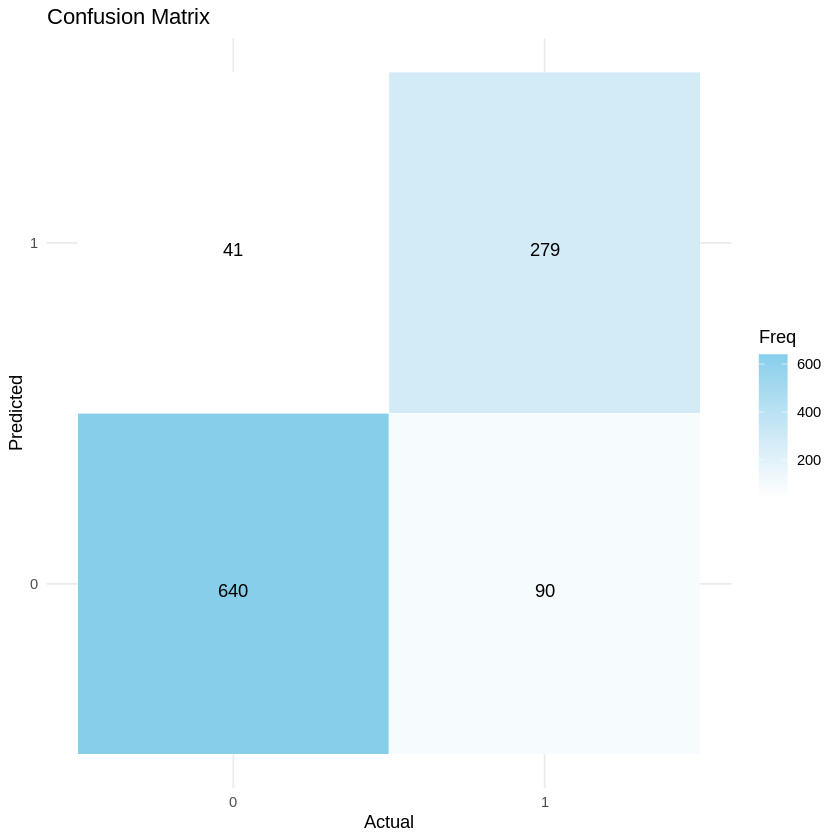

In [500]:
ggplot(data = conf_matrix_df, aes(x = Reference, y = Prediction)) +
  geom_tile(aes(fill = Freq), color = "white") +
  scale_fill_gradient(low = "white", high = "skyblue") +
  geom_text(aes(label = Freq), vjust = 1) +
  labs(title = "Confusion Matrix", x = "Actual", y = "Predicted") +
  theme_minimal()

As seen, the model performs very well as it does not result in false positive or negative values.

##Roc-Auc curve

The ROC-AUC curve is a graphical representation used to evaluate the performance of a binary classification model. The ROC curve plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at various threshold settings. The AUC quantifies the overall ability of the model to distinguish between positive and negative classes, with a value ranging from 0 to 1.


Setting levels: control = 0, case = 1

Setting direction: controls < cases



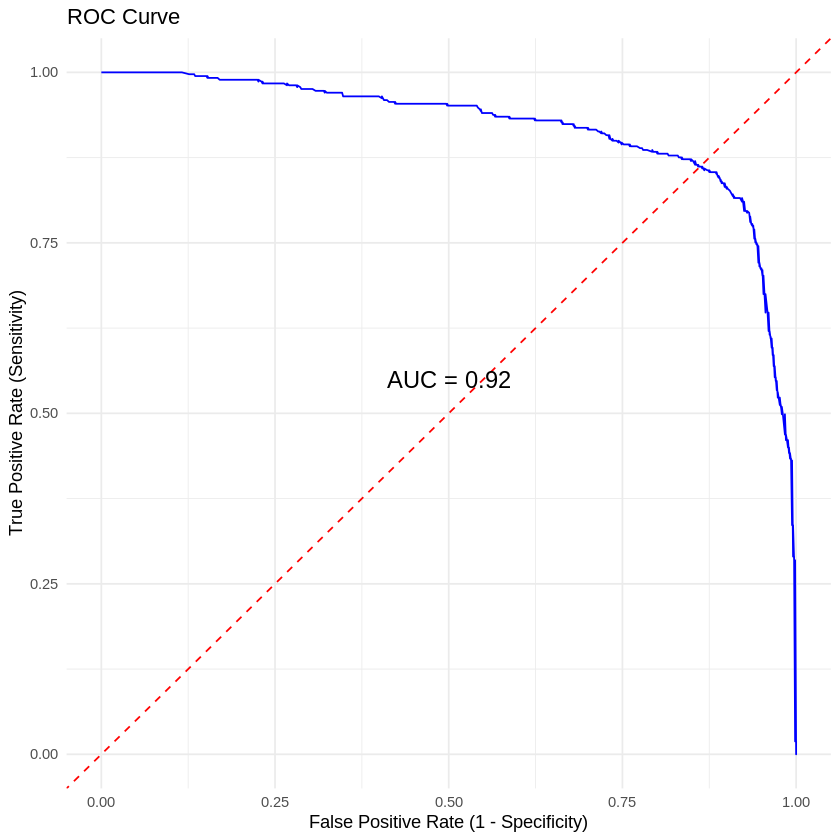

In [505]:
# Plot ROC curve using ggplot2
# Predict probabilities on the test set
final_gbm_probabilities <- predict(final_gbm_model, X_test, n.trees = best_params$n.trees, type = "response")
roc_curve <- roc(y_test, final_gbm_probabilities)

roc_data <- data.frame(
  tpr = rev(roc_curve$sensitivities),  # True positive rate
  fpr = rev(roc_curve$specificities),  # False positive rate
  thresholds = rev(roc_curve$thresholds)
)

ggplot(roc_data, aes(x = fpr, y = tpr)) +
  geom_line(color = "blue") +
  geom_abline(linetype = "dashed", color = "red") +
  ggtitle("ROC Curve") +
  xlab("False Positive Rate (1 - Specificity)") +
  ylab("True Positive Rate (Sensitivity)") +
  theme_minimal() +
  annotate("text", x = 0.5, y = 0.5, label = paste("AUC =", round(auc(roc_curve), 2)), color = "black", size = 5, hjust = 0.5, vjust = -1.5)

Even according to the ROC-AUC curve the model performs very well as the AUC value is very close to 1 and even the curve itself approaches the top right corner which is an indicator of strong performance.

## Recall-precision curve
The Recall-Precision curve is a graphical representation used to evaluate the performance of a binary classification model, particularly under conditions of class imbalance.

The curve helps in understanding the trade-off between precision and recall for different threshold settings. A model with a curve closer to the top-right corner indicates better performance, showing high precision and recall.

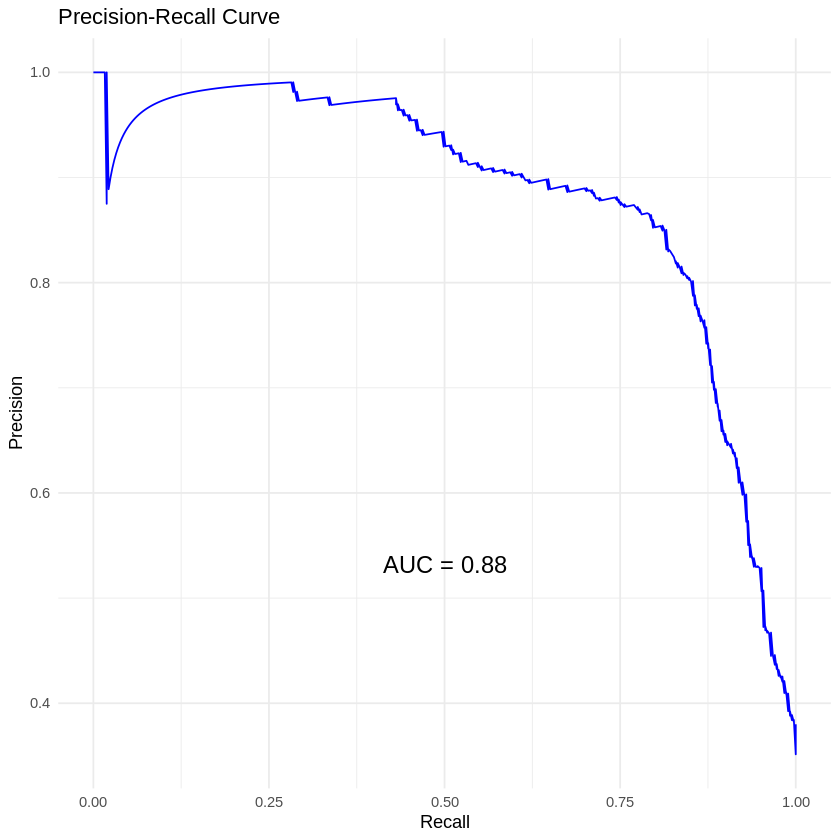

In [513]:
# Computing Precision-Recall curve
pr_curve <- pr.curve(scores.class0 = final_gbm_probabilities, weights.class0 = y_test == 1, curve = TRUE)

# Plotting Precision-Recall curve using ggplot2
pr_data <- data.frame(
  recall = pr_curve$curve[, 1],
  precision = pr_curve$curve[, 2]
)

ggplot(pr_data, aes(x = recall, y = precision)) +
  geom_line(color = "blue") +
  ggtitle("Precision-Recall Curve") +
  xlab("Recall") +
  ylab("Precision") +
  theme_minimal() +
  annotate("text", x = 0.5, y = 0.5, label = paste("AUC =", round(pr_curve$auc.integral, 2)), color = "black", size = 5, hjust = 0.5, vjust = -1.5)

The AUC value is quite high, at 0.88 precisely which indiates a nice balance between precision and recall. Even the shape of the curve indicates that the model is good at maintaining balance but also it has some variation in permance at different thresholds.

## Conclusion

Key factors that contributed in the reliability of such model were the various methods done in the preprocessing stage as not only the data was easier to process it also was balanced. This balance helped the model in acheiving a very decent performance.

A key challenge was the insufficient data and a very high imbalance found on it on the data exploration part. Although this was handled later on, the model could have performed better if the data was of slightly higher quality.

The models could have been subject to more rigrorous testing regarding the hyperparameter tunning stage but such thing was not possible due to limited resources. Regardless, the final model can be considered reliable and sufficient for the task at hand.